In [4]:
import numpy as np
import tensorflow as tf
import scipy as sci
import numba as nb
from numba import jit,njit
import matplotlib.pyplot as plt
import matplotlib.colors as colors



""" 
This file is meant to generate normalized figures based on the Multibrot sequences z_(n+1)=z^p+c. 

The output is a set of 64x64 pictures of pieces of the Multibrot set where the output values are normalized.


"""

2022-01-31 15:06:20.358098: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-31 15:06:20.358138: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


' \nThis file is meant to generate normalized figures based on the Multibrot sequences z_(n+1)=z^p+c. \n\nThe output is a set of 64x64 pictures of pieces of the Multibrot set where the output values are normalized.\n\n\n'

In [5]:

class HistogramNormalize(colors.Normalize):
    def __init__(self, data, vmin=None, vmax=None):
        if vmin is not None:
            data = data[data > vmin]
        if vmax is not None:
            data = data[data < vmax]
            
        sorted_data = np.sort(data.flatten())
        self.sorted_data = sorted_data[np.isfinite(sorted_data)]
        colors.Normalize.__init__(self, vmin, vmax)

    def __call__(self, value, clip=None):
        return np.ma.masked_array(np.searchsorted(self.sorted_data, value) /
                                  len(self.sorted_data))

In [53]:
def fractals(p,c):
    z=0
    for i in range(100):
        z=z**p+c
    z[np.where(np.isnan(z)==True)]=0
    return z


In [62]:
def Rand_pic():
    c_maps=['jet','viridis','plasma','inferno','magma','cividis','rainbow','nipy_spectral','brg']
    c=np.random.randint(0,len(c_maps))
    
    std=0
    
    while std<1e3:
        p=np.random.uniform(2,8)
        x0=np.random.uniform(-2,0.5)
        y0=np.random.uniform(-2,2)
        d_0=np.random.uniform(0,0.75)
    
        x_v=np.linspace(x0,x0+d_0,num=128)
        y_v=np.linspace(y0,y0+d_0,num=128)
    
        z_v=np.abs(np.array([fractals(p,x_v+1j*y_v[i]) for i in range(len(y_v))]))
        
        std=np.std(z_v)
    #print(std)
    normalizer = HistogramNormalize(np.arctanh(z_v))
    fig,ax=plt.subplots()
    im=ax.imshow(np.arctanh(z_v),cmap=c_maps[c],norm=normalizer)#1/(np.exp(z_v/np.max(z_v))+1)
    ax.axis('off')
    #fig.colorbar(im)
    #plt.show()

    return fig

/tmp/ipykernel_933/627304233.py:4: RuntimeWarning: overflow encountered in power
  z=z**p+c
/tmp/ipykernel_933/627304233.py:4: RuntimeWarning: invalid value encountered in power
  z=z**p+c
/tmp/ipykernel_933/3903412224.py:20: RuntimeWarning: invalid value encountered in arctanh
  normalizer = HistogramNormalize(np.arctanh(z_v))
/tmp/ipykernel_933/3903412224.py:22: RuntimeWarning: invalid value encountered in arctanh
  im=ax.imshow(np.arctanh(z_v),cmap=c_maps[c],norm=normalizer)#1/(np.exp(z_v/np.max(z_v))+1)
/tmp/ipykernel_933/3903412224.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax=plt.subplots()


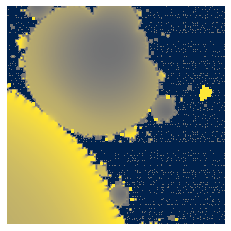

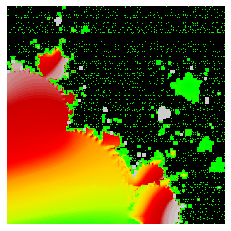

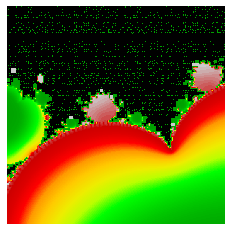

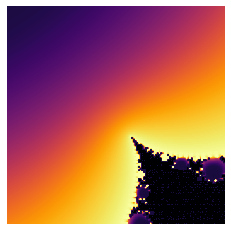

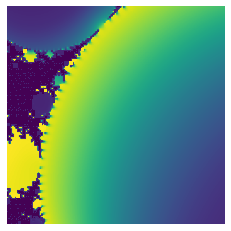

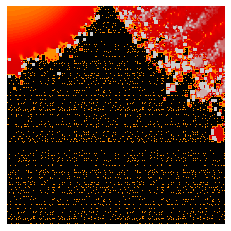

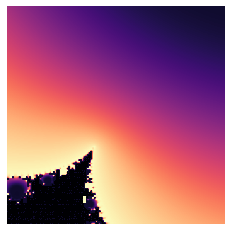

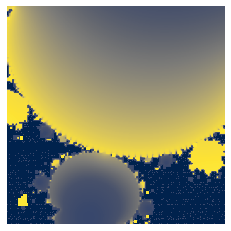

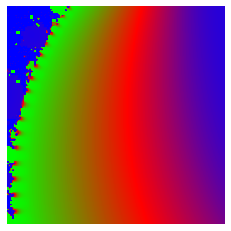

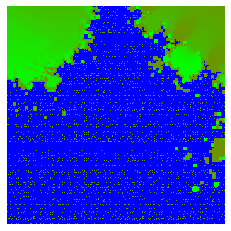

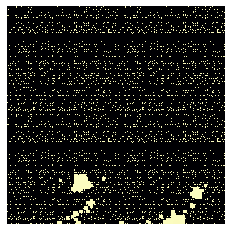

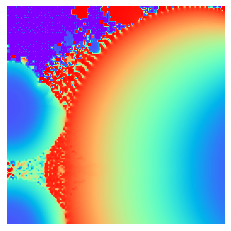

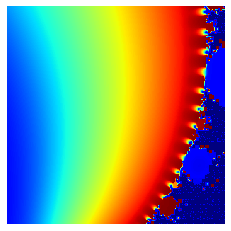

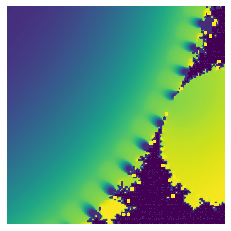

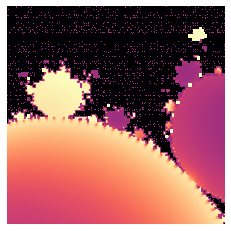

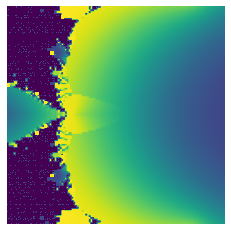

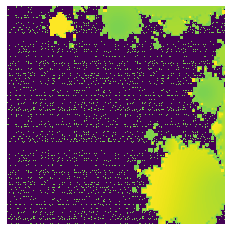

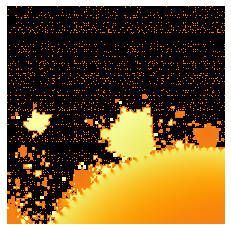

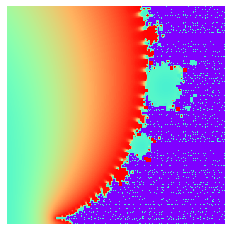

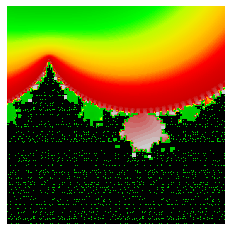

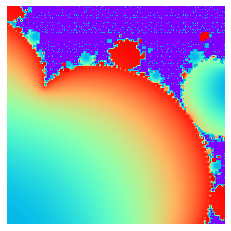

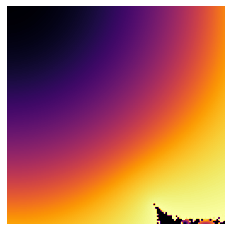

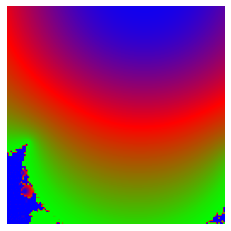

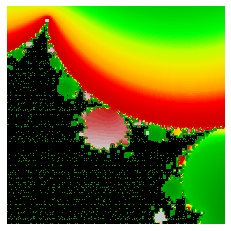

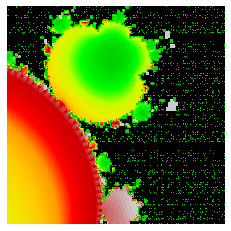

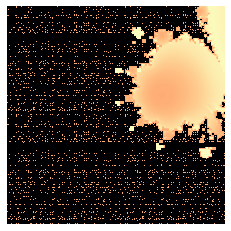

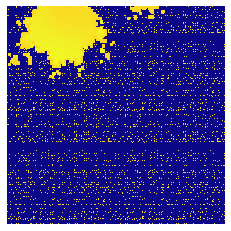

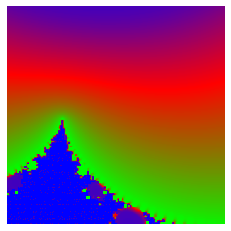

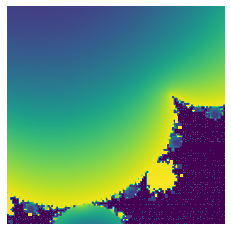

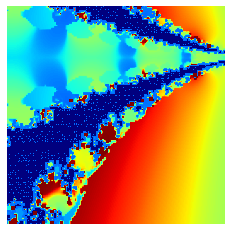

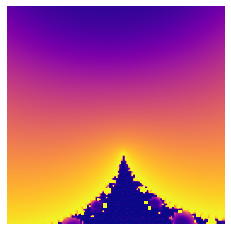

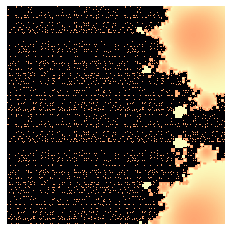

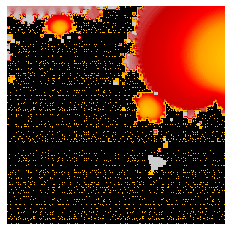

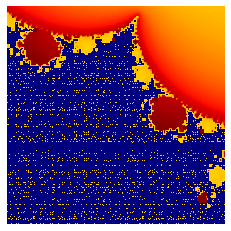

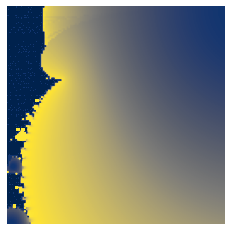

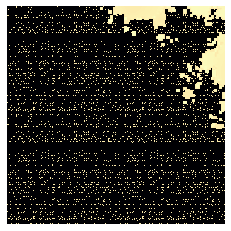

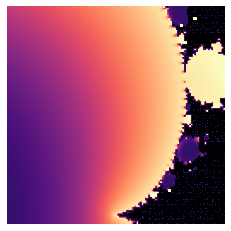

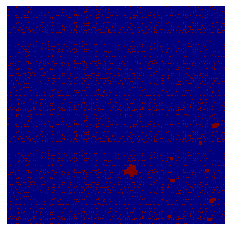

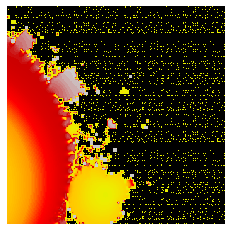

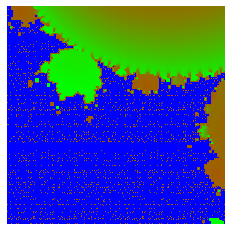

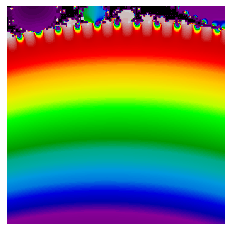

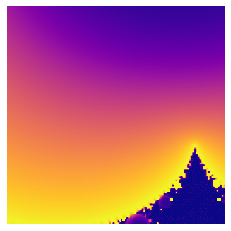

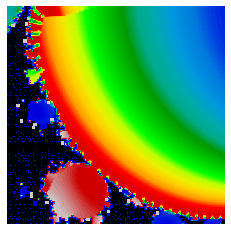

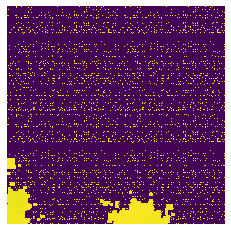

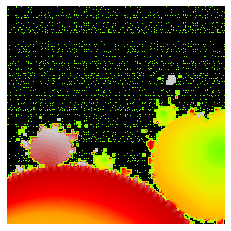

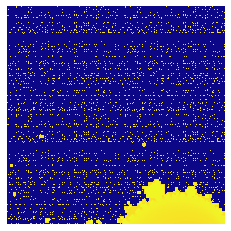

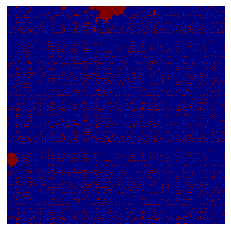

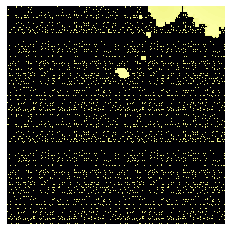

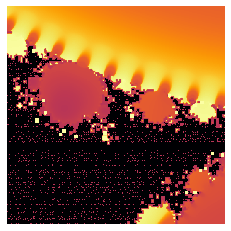

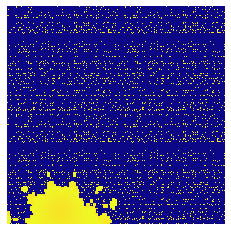

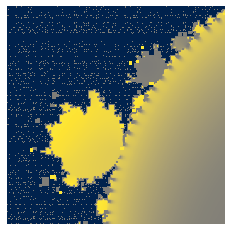

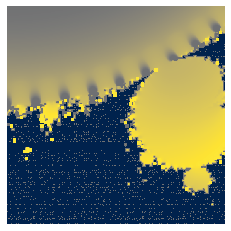

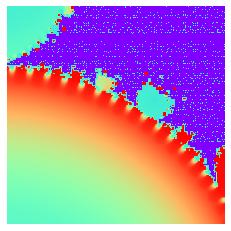

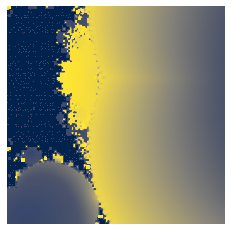

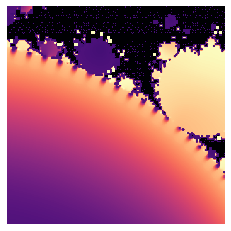

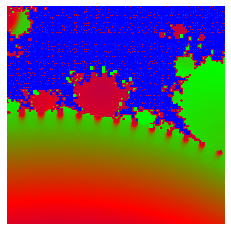

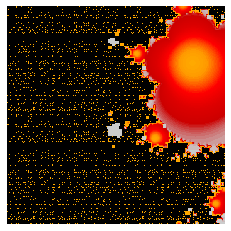

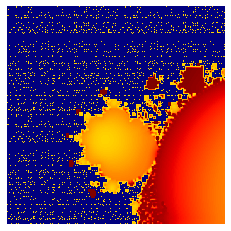

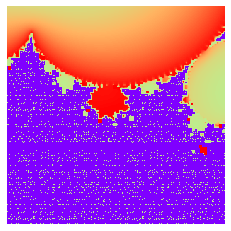

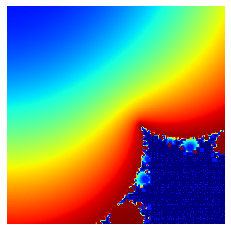

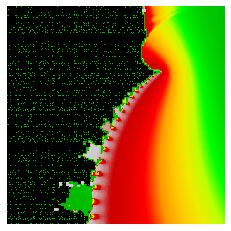

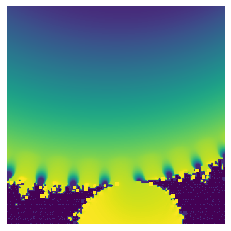

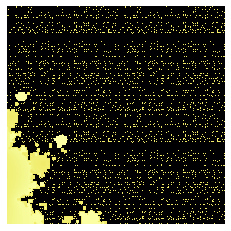

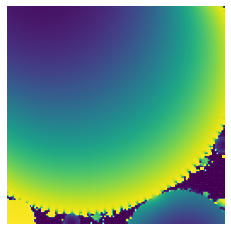

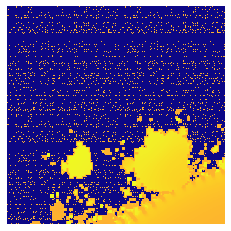

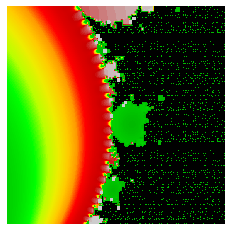

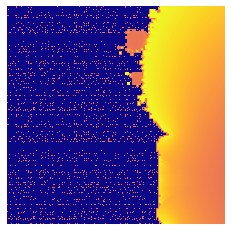

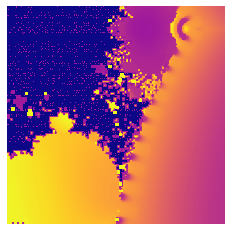

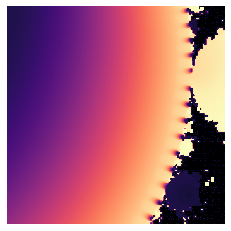

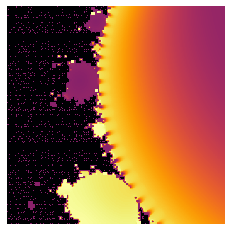

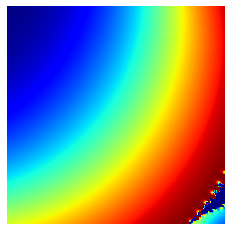

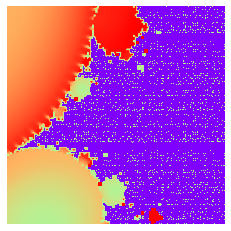

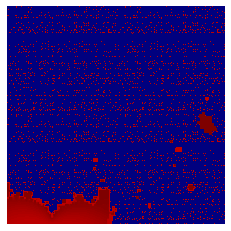

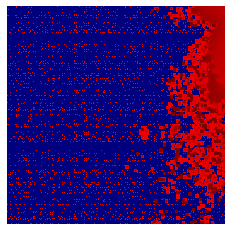

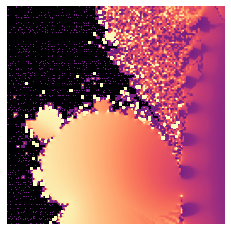

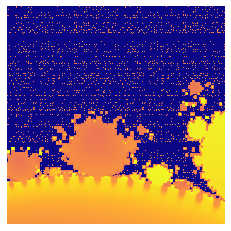

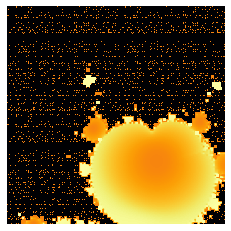

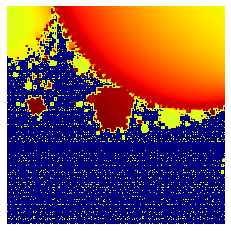

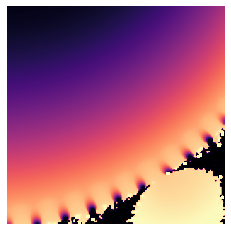

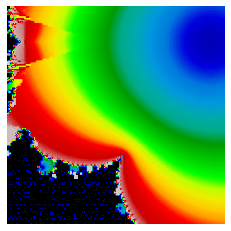

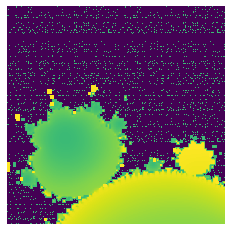

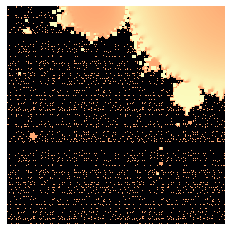

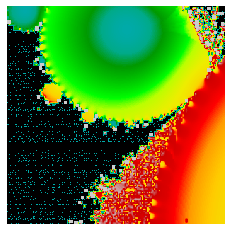

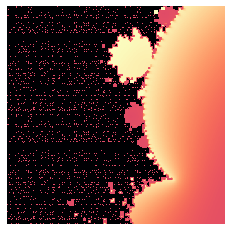

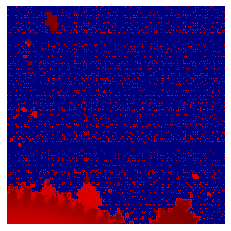

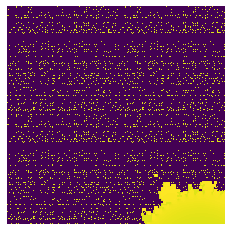

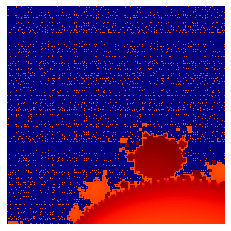

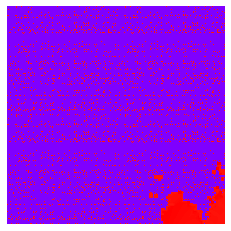

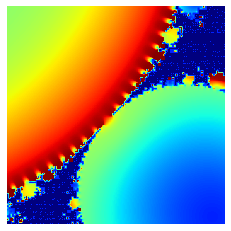

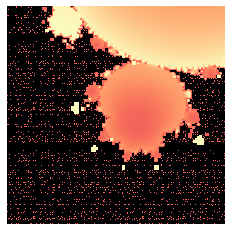

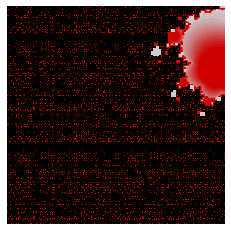

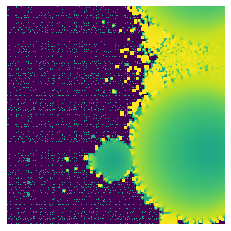

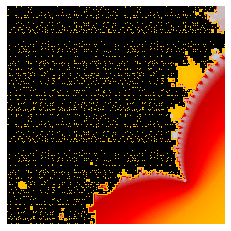

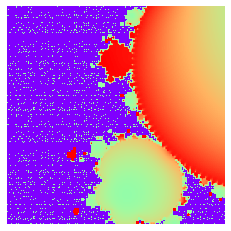

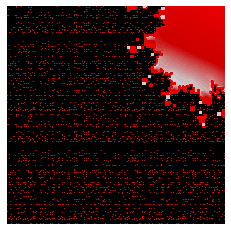

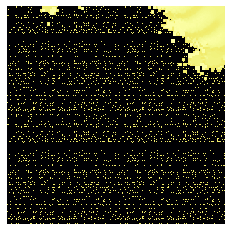

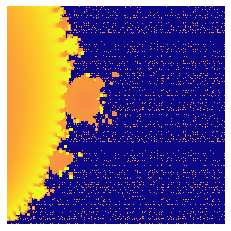

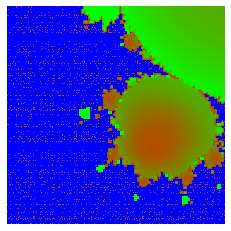

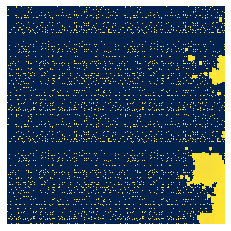

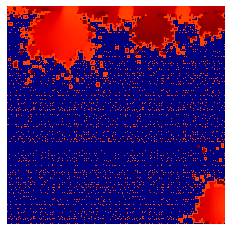

In [63]:
for i in range(100):
    Rand_pic().savefig(r"TPics/fig_{}".format(i),dpi=100,format='png')